In [1]:
import pandas as pd
import yfinance as yf
from datetime import date, timedelta
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression

In [35]:
def corr_finder(a, b, t):
    df = yf.download([a,b], start=date.today() - timedelta(5000), end=date.today() + timedelta(1), interval='1d')
    df = df['Adj Close'].resample('D').last().dropna()
    correlation = df[a].pct_change().corr(df[b].pct_change())
    return correlation

In [43]:
def trainer(independents, dep, p_change_t, t):
    tickers = independents + [dep]
    df = yf.download(tickers, start=date.today() - timedelta(t), end=date.today() + timedelta(1), interval='1d')['Adj Close'].resample('D').last()
    df = df.dropna()
    for c in df.columns:
        df[f'{c}%'] = df[c].pct_change(p_change_t)
    df = df.dropna()
    model = LinearRegression()
    model.fit(df[[f'{c}%' for c in independents]], df[f'{dep}%'])
    df['predicted_dep%'] = model.predict(df[[f'{c}%' for c in independents]])
    df['predicted_dep'] = (1 + df['predicted_dep%']) * df[dep].shift(p_change_t)
    df[[dep, 'predicted_dep']].iloc[-t:,:].plot()
    return df

[*********************100%%**********************]  3 of 3 completed


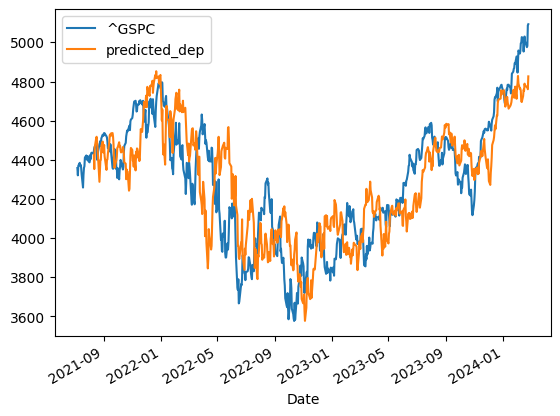

In [45]:
data = trainer(['^TNX', 'JPY=X'], '^GSPC', 25, 1000)